In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,Activation,LeakyReLU,BatchNormalization,MaxPooling2D,Flatten,Dense,Dropout
from keras.preprocessing import image

In [2]:
dataset_url = "C:/Users/gruhe/Desktop/Capstone/DataSet for Capstone"
train_dataset_url = "C:/Users/gruhe/Desktop/Capstone/Model/Split Dataset/train"
val_dataset_url = "C:/Users/gruhe/Desktop/Capstone/Model/Split Dataset/val"
test_dataset_url = "C:/Users/gruhe/Desktop/Capstone/Model/Split Dataset/test"

In [3]:
data_dir = pathlib.Path(dataset_url)
train_data_dir = pathlib.Path(train_dataset_url)
val_data_dir = pathlib.Path(val_dataset_url)
test_data_dir = pathlib.Path(test_dataset_url)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

54305


In [5]:
batch_size = 32
img_height = 256
img_width = 256

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
#   validation_split=0.2,      #remove when putting specific train data
#   subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 43429 files belonging to 38 classes.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_data_dir,
  # validation_split=0.2,       #remove when putting specific test data
  # subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5417 files belonging to 38 classes.


In [8]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)
print('*'*45)
print('Number of classes of data :',num_classes)
print('*'*45)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [9]:
num_classes = len(class_names)

inputShape = (256,256,3)
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=inputShape),
    layers.Conv2D(32, (3, 3), padding="same",input_shape=inputShape),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(axis=-1),
    layers.MaxPooling2D(pool_size=(3, 3)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding="same"),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(64, (3, 3), padding="same"),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(axis=-1),
    layers.MaxPooling2D(pool_size=(3, 3)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding="same"),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(128, (3, 3), padding="same"),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(axis=-1),
    layers.MaxPooling2D(pool_size=(3, 3)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), padding="same"),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(256, (3, 3), padding="same"),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(axis=-1),
    layers.MaxPooling2D(pool_size=(3, 3)),
    layers.Dropout(0.25),

    layers.Conv2D(512, (3, 3), padding="same"),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(axis=-1),

    layers.Flatten(),

    layers.Dense(1024),
    layers.LeakyReLU(alpha=0.1),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(len(class_names)),
    layers.Activation("softmax"),
])

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0

In [12]:
tf.keras.backend.clear_session()

In [13]:
epochs = 10
history = model.fit(
  # steps_per_epoch = 100,
  x=train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size = batch_size,
)

Epoch 1/10


c:\Users\gruhe\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5586: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1358/1358 [==============================] - 2138s 2s/step - loss: 1.0662 - accuracy: 0.7058 - val_loss: 0.6466 - val_accuracy: 0.8396
Epoch 2/10
1358/1358 [==============================] - 2134s 2s/step - loss: 0.4270 - accuracy: 0.8702 - val_loss: 1.1783 - val_accuracy: 0.7410
Epoch 3/10
1358/1358 [==============================] - 2103s 2s/step - loss: 0.3121 - accuracy: 0.9034 - val_loss: 0.3466 - val_accuracy: 0.8981
Epoch 4/10
1358/1358 [==============================] - 2096s 2s/step - loss: 0.2465 - accuracy: 0.9242 - val_loss: 0.8335 - val_accuracy: 0.8246
Epoch 5/10
1358/1358 [==============================] - 2094s 2s/step - loss: 0.1966 - accuracy: 0.9379 - val_loss: 0.4302 - val_accuracy: 0.9040
Epoch 6/10
1358/1358 [==============================] - 2097s 2s/step - loss: 0.1792 - accuracy: 0.9460 - val_loss: 0.9043 - val_accuracy: 0.7947
Epoch 7/10
1358/1358 [==============================] - 2095s 2s/step - loss: 0.1497 - accuracy: 0.9537 - val_loss: 0.2804 - val_accura

In [14]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  # validation_split=0.2,       #remove when putting specific test data
  # subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5459 files belonging to 38 classes.


In [15]:
evaluated = model.evaluate(
    test_ds,
    batch_size=batch_size,
)

171/171 [==============================] - 50s 294ms/step - loss: 0.3249 - accuracy: 0.9269


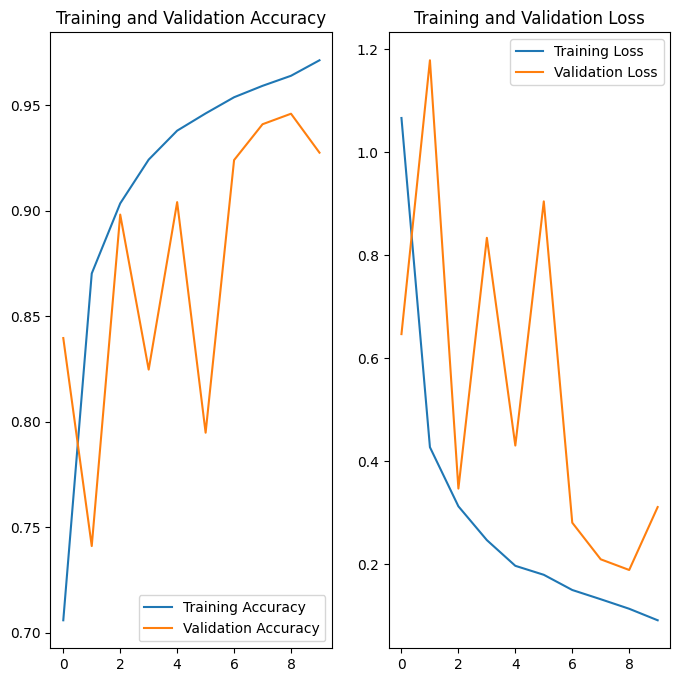

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.save("C:/Users/gruhe/Desktop/Capstone/Model/fridayModel.h5")

In [18]:
import pickle

In [19]:
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

Keras model saving:
File Name                                             Modified             Size
config.json                                    2022-11-12 00:49:19        14393
metadata.json                                  2022-11-12 00:49:19           64
model/layers/batch_normalization/weights.npz   2022-11-12 00:49:19         4954
model/layers/batch_normalization_1/weights.npz 2022-11-12 00:49:19         6490
model/layers/batch_normalization_2/weights.npz 2022-11-12 00:49:19         6490
model/layers/batch_normalization_3/weights.npz 2022-11-12 00:49:19         9562
model/layers/batch_normalization_4/weights.npz 2022-11-12 00:49:19         9562
model/layers/batch_normalization_5/weights.npz 2022-11-12 00:49:19        15706
model/layers/batch_normalization_6/weights.npz 2022-11-12 00:49:19        15706
model/layers/batch_normalization_7/weights.npz 2022-11-12 00:49:19        27994
model/layers/batch_normalization_8/weights.npz 2022-11-12 00:49:20        52570
model/layers/conv2d/

In [20]:
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

Keras model loading:
File Name                                             Modified             Size
config.json                                    2022-11-12 00:49:18        14393
metadata.json                                  2022-11-12 00:49:18           64
model/layers/batch_normalization/weights.npz   2022-11-12 00:49:18         4954
model/layers/batch_normalization_1/weights.npz 2022-11-12 00:49:18         6490
model/layers/batch_normalization_2/weights.npz 2022-11-12 00:49:18         6490
model/layers/batch_normalization_3/weights.npz 2022-11-12 00:49:18         9562
model/layers/batch_normalization_4/weights.npz 2022-11-12 00:49:18         9562
model/layers/batch_normalization_5/weights.npz 2022-11-12 00:49:18        15706
model/layers/batch_normalization_6/weights.npz 2022-11-12 00:49:18        15706
model/layers/batch_normalization_7/weights.npz 2022-11-12 00:49:18        27994
model/layers/batch_normalization_8/weights.npz 2022-11-12 00:49:20        52570
model/layers/conv2d

In [21]:
sample_file = "C:/Users/gruhe/Desktop/Capstone/Model/Split Dataset/test/Tomato___healthy/image-865.jpg"

In [23]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

sample_img = image.load_img(sample_file,target_size = (256,256,3))
sample_img = image.img_to_array(sample_img)
sample_img = np.expand_dims(sample_img,axis=0)

In [24]:
result = lr.predict(sample_img)
print(result)
print(len(result[0]))

1/1 [==============================] - 0s 217ms/step
[[9.0940498e-15 3.4888044e-15 6.9069511e-13 4.3891371e-09 9.6604243e-15
  5.1459179e-16 1.2328276e-11 4.6483564e-12 4.2944272e-13 1.2739070e-14
  8.9927256e-05 7.7005766e-16 3.1892110e-13 1.2395904e-14 4.3224474e-10
  2.5072137e-15 1.6797117e-13 1.2577557e-13 8.9618732e-23 7.6886278e-13
  1.0838955e-13 5.3251261e-17 2.0387158e-15 1.6354049e-10 3.9847603e-10
  7.4043229e-14 2.2805809e-15 2.7028787e-12 5.9937688e-10 3.7939822e-14
  3.7588273e-13 4.0780773e-12 2.6807232e-13 1.1847956e-12 9.3941424e-13
  8.1433497e-12 1.5536136e-12 9.9991012e-01]]
38


In [26]:
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
print(len(class_names))
print(result.max())
print(class_names[result.argmax()])

38
0.9999101
Tomato___healthy
